# Custom fit function

In [1]:
import numpy as np
from smpl import plot
from smpl import io
from smpl import functions as f
import uncertainties.unumpy as unp
import smpl
smpl.__version__

'1.0.1.8'

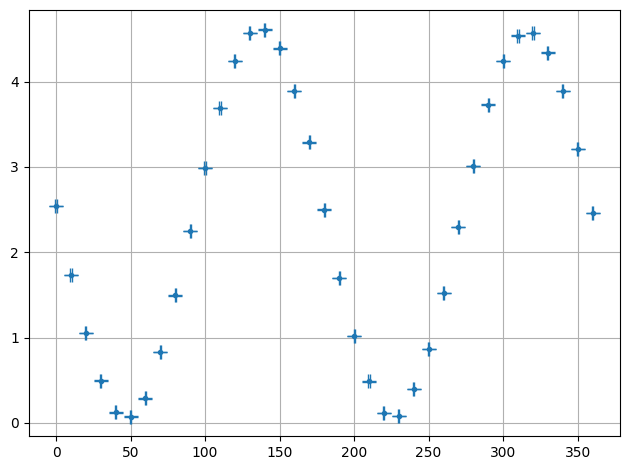

In [2]:
data = data_malus = np.loadtxt(io.find_file("test_custom_data.csv",3),skiprows = 1, delimiter=',')
ydata = unp.uarray(data[:,0],data[:,1])
xdata = unp.uarray(data[:,2],data[:,3])
plot.data(xdata,ydata)

## Initial guess
params allows to set initial guess values for fitting.

[0.0675892411663342+/-0.002521847676338688,
 4.616937138968342+/-0.002800380217490259,
 0.017517668882117022+/-1.1151509984952337e-05,
 132.77077908815843+/-0.0023481770875747364]

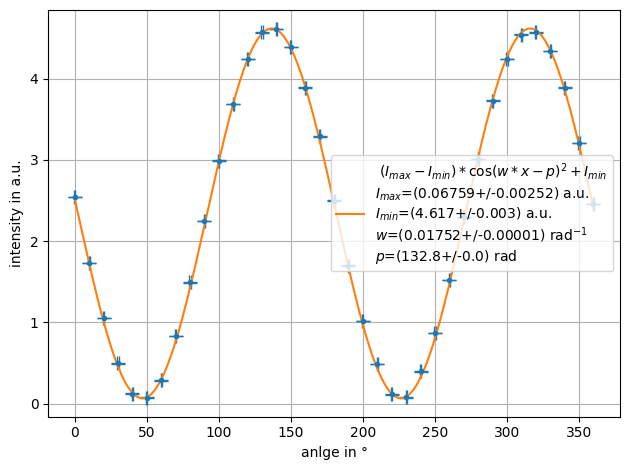

In [3]:

def Malus(x,I_max,I_min,w,p):
    ''' $(I_{max}-I_{min})*\\cos(w*x-p)^2+I_{min} $'''
    return (I_max-I_min)*unp.cos(w*x-p)**2+I_min

plot.fit((xdata),ydata,Malus,xaxis="anlge in °", yaxis="intensity in a.u.", params=[4.6,0.11,0.0175,180+90-137], units=["a.u.","a.u.","rad$^{-1}$","rad"])